# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 4.5 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.0 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = ""
kaggle_key = ""

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 13.2MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
train = train.drop(columns=['casual','registered'])
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


In [9]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [12]:
predictor = TabularPredictor(label='count',eval_metric='root_mean_squared_error',problem_type='regression').fit(train,time_limit=600,presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20221127_065456/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221127_065456/"
AutoGluon Version:  0.6.0
Python Version:     3.7.15
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11363.71 MB
	Train Data (Original)  Memory Usage: 1.52 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note

### Review AutoGluon's training run with ranking of models that did the best.

In [13]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.034001      22.839152  509.988004                0.001795           0.302004            3       True         13
1   RandomForestMSE_BAG_L2  -53.349908      18.781889  358.255479                0.755065          29.621832            2       True         11
2          LightGBM_BAG_L2  -55.100318      18.292227  356.211059                0.265403          27.577412            2       True         10
3          CatBoost_BAG_L2  -55.649079      18.119438  399.172718                0.092614          70.539071            2       True         12
4        LightGBMXT_BAG_L2  -60.418470      21.724275  381.947685                3.697451          53.314038            2       True          9
5    KNeighborsDist_BAG_L1  -84.125061       0.109253    0.052754         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54429428704391,
  'CatBoost_BAG_L1': -130.94112847564628,
  'ExtraTree

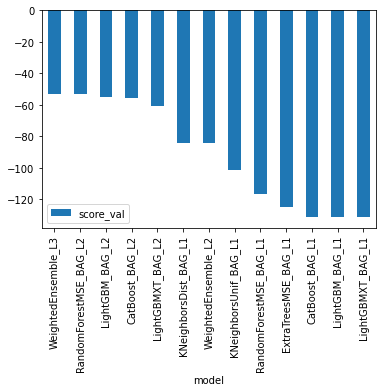

In [14]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

In [15]:
predictions = predictor.predict(test)
predictions.head()

0    23.621901
1    42.521679
2    45.928860
3    49.849319
4    52.071735
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [16]:
# Describe the `predictions` series to see if there are any negative values
predictions.min()

3.159299

In [17]:
# How many negative values do we have?
sum(predictions<0)

0

There are no predictions < 0

### Set predictions to submission dataframe, save, and submit

In [18]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [19]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 994kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [20]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2022-11-27 07:05:36  first raw submission               complete  1.79327      1.79327       
submission_new_hpo.csv       2022-11-26 22:42:09  new features with hyperparameters  complete  0.50480      0.50480       
submission_new_features.csv  2022-11-26 22:41:22  new features                       complete  0.45849      0.45849       
submission.csv               2022-11-26 22:30:28  first raw submission               complete  1.79855      1.79855       


### Initial score of  1.79327

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [21]:
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline

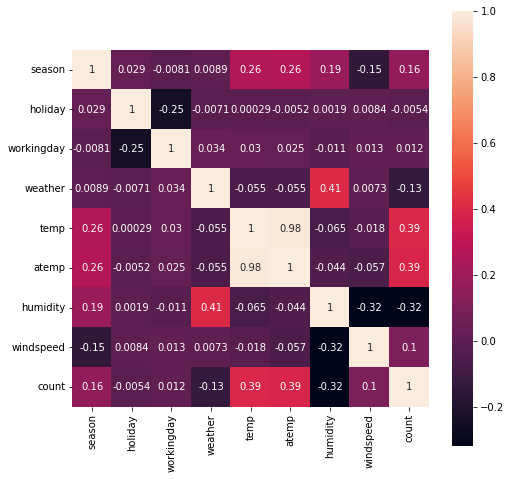

In [22]:
corr=train.corr()
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True, square=True)
plt.show()



1. Temp is correlated with Atemp
2. weather and count are inversely correlated
3. Temp and Atemp are correlated with Count 
 





array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f600e675610>,
      dtype=object)

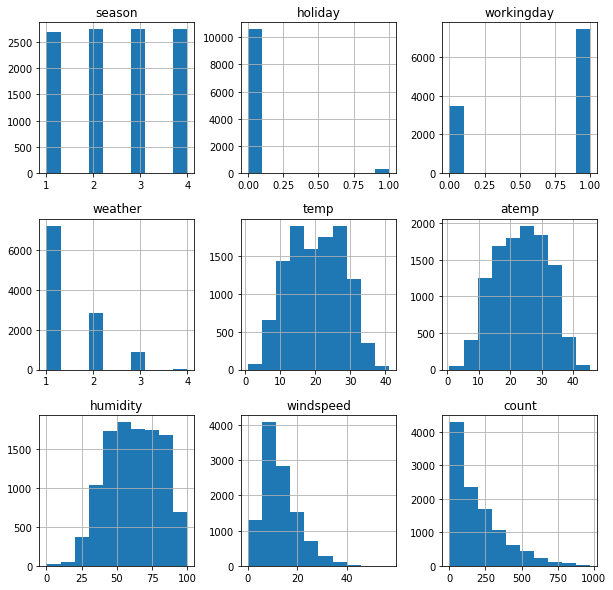

In [23]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(10,10))

I see that workingday, holiday, weather, and season are categorical columns 

In [24]:
from datetime import *


In [25]:
train['datetime']=train['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
train['hour']=train['datetime'].dt.hour
train['hour']

0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: hour, Length: 10886, dtype: int64

In [26]:
train['date']=train['datetime'].dt.date
train['date']

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
10881    2012-12-19
10882    2012-12-19
10883    2012-12-19
10884    2012-12-19
10885    2012-12-19
Name: date, Length: 10886, dtype: object

In [27]:
train['month']=train['datetime'].dt.month
train['month']

0         1
1         1
2         1
3         1
4         1
         ..
10881    12
10882    12
10883    12
10884    12
10885    12
Name: month, Length: 10886, dtype: int64

In [28]:
test['datetime']=test['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
test['hour']=test['datetime'].dt.hour
test['hour']

0        0
1        1
2        2
3        3
4        4
        ..
6488    19
6489    20
6490    21
6491    22
6492    23
Name: hour, Length: 6493, dtype: int64

In [29]:
test['date']=test['datetime'].dt.date
test['date']

0       2011-01-20
1       2011-01-20
2       2011-01-20
3       2011-01-20
4       2011-01-20
           ...    
6488    2012-12-31
6489    2012-12-31
6490    2012-12-31
6491    2012-12-31
6492    2012-12-31
Name: date, Length: 6493, dtype: object

In [30]:
test['month']=test['datetime'].dt.month
test['month']

0        1
1        1
2        1
3        1
4        1
        ..
6488    12
6489    12
6490    12
6491    12
6492    12
Name: month, Length: 6493, dtype: int64

### Let's visualize time data

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


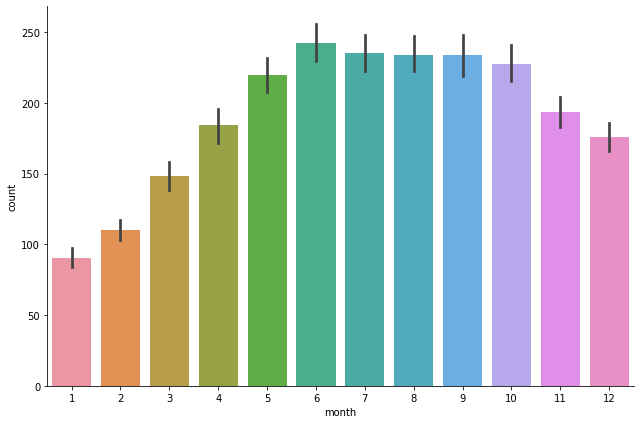

In [31]:
sns.factorplot(x='month',y='count',data=train,kind='bar',size=6,aspect=1.5)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


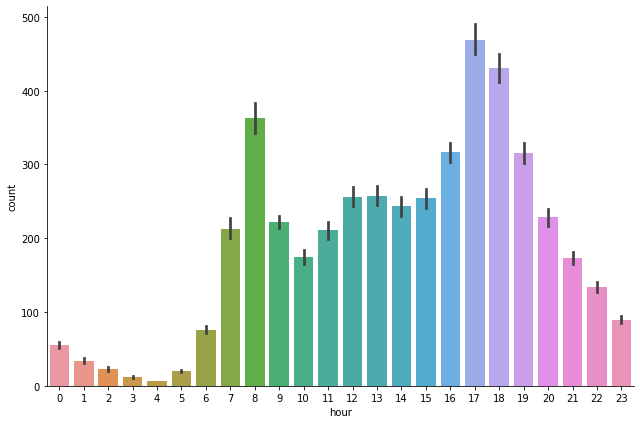

In [32]:
sns.factorplot(x='hour',y='count',data=train,kind='bar',size=6,aspect=1.5)

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [33]:
categorical_col = ["hour","month","season","weather","holiday","workingday"]

for col in categorical_col:
  train[col]=train[col].astype('category')
  test[col]=test[col].astype('category')



In [34]:
train=train.drop(columns=['datetime'])
test=test.drop(columns=['datetime'])


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  category
 2   workingday  10886 non-null  category
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   count       10886 non-null  int64   
 9   hour        10886 non-null  category
 10  date        10886 non-null  object  
 11  month       10886 non-null  category
dtypes: category(6), float64(3), int64(2), object(1)
memory usage: 575.9+ KB


In [36]:
# View are new feature
print(train['season'].value_counts())
print(train['weather'].value_counts())
print(train['holiday'].value_counts())
print(train['workingday'].value_counts())


4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
0    10575
1      311
Name: holiday, dtype: int64
1    7412
0    3474
Name: workingday, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f600e0970d0>,
      dtype=object)

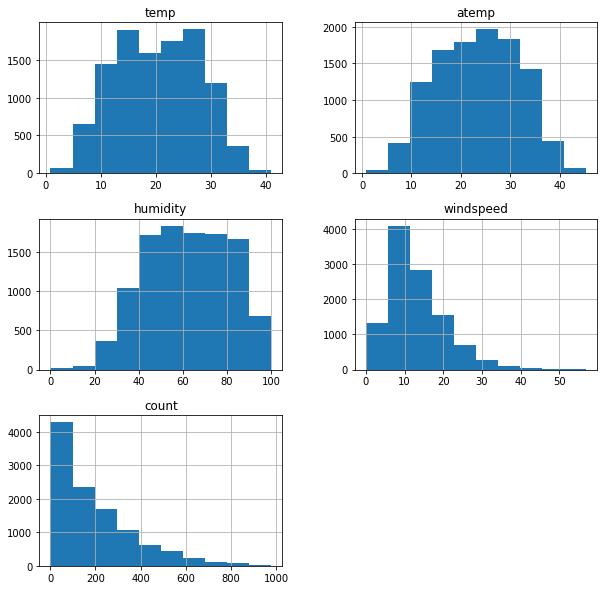

In [37]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(10,10))

## Step 5: Rerun the model with the same settings as before, just with more features

In [38]:
predictor_new_features = TabularPredictor(label='count',eval_metric='root_mean_squared_error').fit(train,time_limit=600,presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20221127_070543/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221127_070543/"
AutoGluon Version:  0.6.0
Python Version:     3.7.15
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [39]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -33.739054      12.606657  564.938906                0.002481           0.292592            3       True         14
1      WeightedEnsemble_L2  -33.827289      10.296219  357.454971                0.000875           0.535668            2       True          9
2          CatBoost_BAG_L2  -33.900533      11.203678  473.323631                0.147758          74.145425            2       True         13
3          LightGBM_BAG_L2  -34.268579      11.241538  423.621703                0.185619          24.443498            2       True         11
4        LightGBMXT_BAG_L2  -34.692020      11.454406  424.558205                0.398486          25.379999            2       True         10
5   RandomForestMSE_BAG_L2  -34.737481      11.872313  440.677391         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -139.72068794885928,
  'KNeighborsDist_BAG_L1': -139.27725193275344,
  'LightGBMXT_BAG_L1': -35.30043801648567,
  'LightGBM_BAG_L1': -35.55973339185614,
  'RandomForestMSE_BAG_L1': -38.50

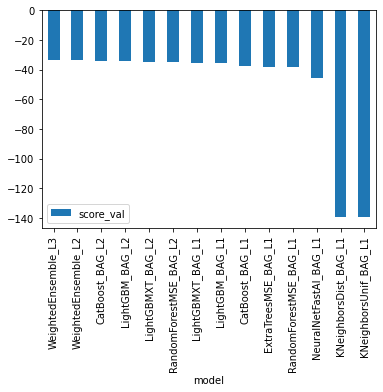

In [40]:
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [41]:

predictions = predictor_new_features.predict(test)
predictions.head()

0    13.770283
1     7.305984
2     6.526999
3     6.125182
4     6.005722
Name: count, dtype: float32

In [42]:
# Remember to set all negative values to zero
sum(predictions<0)

0

In [43]:
# Same submitting predictions
submission_new_features=submission
submission_new_features["count"] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [44]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 864kB/s]
Successfully submitted to Bike Sharing Demand

In [45]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2022-11-27 07:16:16  new features                       complete  0.45955      0.45955       
submission.csv               2022-11-27 07:05:36  first raw submission               complete  1.79327      1.79327       
submission_new_hpo.csv       2022-11-26 22:42:09  new features with hyperparameters  complete  0.50480      0.50480       
submission_new_features.csv  2022-11-26 22:41:22  new features                       complete  0.45849      0.45849       


#### New Score of 0.45915

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [46]:
time_limit=20*60 
num_trials=5
search_strategy='auto'

hyperparameter_tune_kwargs={
    'num_trials':num_trials,
    'schedular':'local',
    'searcher':search_strategy
}

In [47]:
predictor_new_hpo = TabularPredictor(label='count',eval_metric='root_mean_squared_error').fit(
    train,time_limit=time_limit,presets="best_quality",
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

No path specified. Models will be saved in: "AutogluonModels/ag-20221127_071619/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "AutogluonModels/ag-20221127_071619/"
AutoGluon Version:  0.6.0
Python Version:     3.7.15
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

In [48]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  LightGBMLarge_BAG_L1 -35.064365      45.994298   655.483313               45.994298         655.483313            1       True          1
1   WeightedEnsemble_L2 -35.064365      45.995213   655.488947                0.000915           0.005634            2       True          2
2  LightGBMLarge_BAG_L2 -36.456979      49.856149  1053.050579                3.861851         397.567266            2       True          3
3   WeightedEnsemble_L3 -36.456979      49.857277  1053.056048                0.001128           0.005469            3       True          4
Number of models trained: 4
Types of models trained:
{'WeightedEnsembleModel', 'StackerEnsembleModel_LGB'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: True  (with 3 levels)
Feature Metadata (Processed):
(raw

{'model_types': {'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMLarge_BAG_L1': -35.06436544346103,
  'WeightedEnsemble_L2': -35.06436544346103,
  'LightGBMLarge_BAG_L2': -36.456979441385194,
  'WeightedEnsemble_L3': -36.456979441385194},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBMLarge_BAG_L1': 'AutogluonModels/ag-20221127_071619/models/LightGBMLarge_BAG_L1/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20221127_071619/models/WeightedEnsemble_L2/',
  'LightGBMLarge_BAG_L2': 'AutogluonModels/ag-20221127_071619/models/LightGBMLarge_BAG_L2/',
  'WeightedEnsemble_L3': 'AutogluonModels/ag-20221127_071619/models/WeightedEnsemble_L3/'},
 'model_fit_times': {'LightGBMLarge_BAG_L1': 655.4833126068115,
  'WeightedEnsemble_L2': 0.005634307861328125,
  'LightGBMLarge_BAG_L2': 397.5672662

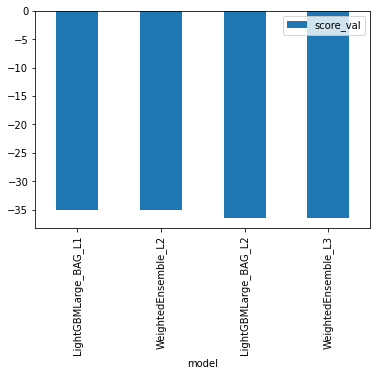

In [56]:
predictor_new_hpo.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [57]:
# Remember to set all negative values to zero

predictions_new_hpo = predictor_new_hpo.predict(test)



KeyboardInterrupt



In [58]:
sum(predictions_new_hpo<0)


39

In [61]:
predictions_new_hpo[predictions_new_hpo<0]=0


In [62]:

sum(predictions_new_hpo<0)


0

In [63]:
# Same submitting predictions
submission_new_hpo=submission
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [64]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 979kB/s]
Successfully submitted to Bike Sharing Demand

In [65]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-11-27 07:44:50  new features with hyperparameters  complete  0.50329      0.50329       
submission_new_hpo.csv       2022-11-27 07:40:47  new features with hyperparameters  error                                
submission_new_hpo.csv       2022-11-27 07:40:27  new features with hyperparameters  error                                
submission_new_features.csv  2022-11-27 07:16:16  new features                       complete  0.45955      0.45955       


#### New Score of 0.50480

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

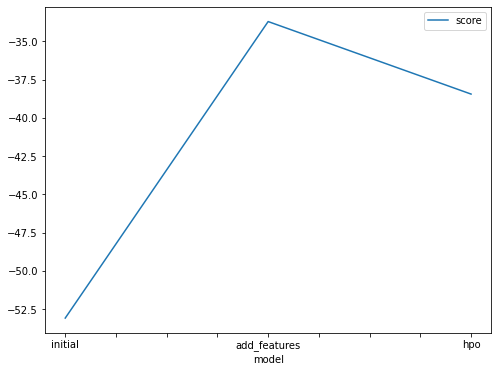

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.072510 ,-33.716856 ,  -35.450757]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

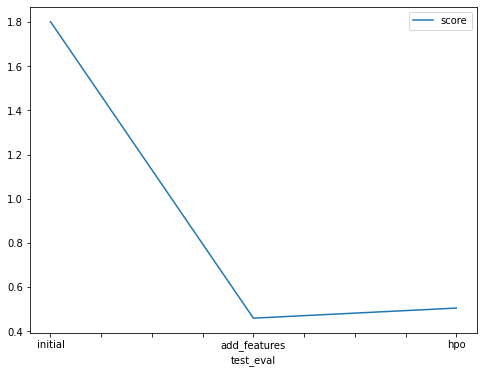

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80155, 0.45915, 0.50480]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [600, 600, 900],
    "hpo2": ['best_quality', 'best_quality', 'best_quality'],
    "hpo3": ['rmse', 'rmse','rmse'],
    "score": [1.80155, 0.45915, 0.50480]
})

,model,hpo1,hpo2,hpo3,score
0,initial,600,best_quality,rmse,1.80155
1,add_features,600,best_quality,rmse,0.45915
2,hpo,900,best_quality,rmse,0.50480


In [1]:
!jupyter nbconvert --to html project.ipynb

[NbConvertApp] Converting notebook project.ipynb to html
[NbConvertApp] Writing 1060239 bytes to project.html
